In [18]:
# Import generic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import librosa
import IPython.display as ipd
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv('music.csv')
data.head()

,zcrs,mfccs,chroma,rmse,spec_c,spec_b,rolloff,class_label
0,0.150044,-8.459356,0.388125,0.037607,2612.358748,2139.577794,4620.238729,Human-Speech
1,0.123951,-7.779772,0.405367,0.054338,2159.300344,1991.255180,3995.042509,Human-Speech
2,0.071148,5.206492,0.567012,0.329862,2344.515069,2663.768393,5363.817566,Music
3,0.136798,1.928085,0.449995,0.272583,2985.277462,2790.678112,6261.262139,Music
4,0.126048,-7.293183,0.392444,0.077955,2331.708888,1989.404083,4185.341358,Human-Speech


In [69]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X = scaler.transform(X)
featuresdf = pd.DataFrame(X, columns=['zcrs','mfccs','chroma','rmse','spec_c',
                                             'spec_b','rolloff'])
print(featuresdf.head())

       zcrs     mfccs    chroma      rmse    spec_c    spec_b   rolloff
0  4.075915  0.668946  0.119145  0.169828 -0.500708 -0.834334 -0.503517
1  3.101963  0.671816  0.268287  0.263669 -0.500799 -0.834388 -0.503544
2  1.131037  0.726653  1.666529  1.808955 -0.500762 -0.834145 -0.503485
3  3.581505  0.712809  0.654326  1.487702 -0.500634 -0.834099 -0.503446
4  3.180227  0.673870  0.156504  0.396122 -0.500764 -0.834389 -0.503536


In [145]:
from sklearn.model_selection import train_test_split

X1=data.iloc[:,-5]
X2=data.iloc[:,-6]
X = np.column_stack((X1,X2))
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import GaussianNB
model_RMSE_Chroma = GaussianNB()
model_RMSE_Chroma.fit(X_train,y_train)
predicted= model_RMSE_Chroma.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.8372093023255814


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X1=data.iloc[:,-3]
X2=data.iloc[:,-4]
X = np.column_stack((X1,X2))
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import GaussianNB
model_SPECB_SPECC = GaussianNB()
model_SPECB_SPECC.fit(X_train,y_train)
predicted= model_SPECB_SPECC.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.5581395348837209


164    0
25     1
206    0
55     1
39     1
88     1
179    0
120    0
134    0
116    1
76     1
71     1
117    0
201    0
38     1
112    1
154    0
26     1
156    0
48     1
213    0
109    1
204    0
139    0
104    1
57     1
193    0
4      1
42     1
210    0
107    1
9      0
177    0
94     1
113    1
47     1
80     1
207    0
148    0
202    0
187    0
64     1
78     1
Name: class_label, dtype: int64
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


ValueError: Found input variables with inconsistent numbers of samples: [43, 129]

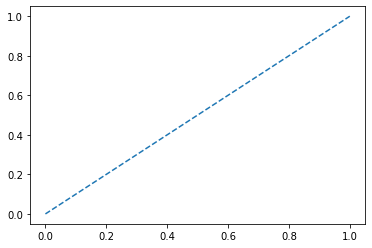

In [153]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# y_test = y_test.map({'Human-Speech': 1, 'Music': 0}).astype(int)


ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label=1)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

# GNB ROC RMSE_CHROMA.

# f1 = []
# for i in Y_gnb_score1[:, 1]:
#     if i>0.5:
#         f.append(1)
#     else:
#         f.append(0)
Y_gnb_score1 = model_RMSE_Chroma.predict_proba(X_test)
print(y_test)
print(Y_gnb_score1[:,1])
fpr1, tpr1, _ = roc_curve(y_test, f, pos_label=0)
roc_auc1 = auc(fpr1,tpr1)
plt.plot( fpr1, tpr1, label='ROC curve (RMSE_Chroma) (area = %0.2f)' % roc_auc1)

# GNB ROC SPECB_SPECC.
Y_gnb_score2 = model_SPECB_SPECC.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, Y_gnb_score2[:,1],pos_label=0)
roc_auc2 = auc(fpr2, tpr2)
plt.plot( fpr2, tpr2, label='ROC curve (SPECB_SPECC) (area = %0.2f)' % roc_auc2)

plt.legend()

In [ ]:
Y_gnb_score1[:, 1]